## Use barcharts and heatmaps to visualize patterns in your data
IGN Game Reviews provide scores from experts for the most recent game releases, ranging from 0 (Disaster) to 10 (Masterpiece).
<img src="https://i.imgur.com/Oh06Fu1.png">




## Load the data
1. Read the IGN data file into a dataframe named `ign_scores`.  
2. Use the `"Platform"` column to label the rows.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IGN="https://raw.githubusercontent.com/csbfx/advpy122-data/master/ign_scores.csv"
## Your code here . . .

ign_scores = pd.read_csv(IGN, index_col = 'Platform')
ign_scores

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000
Nintendo 64,6.649057,8.250000,7.000000,5.681250,6.889655,7.461538,6.050000,6.939623,8.042857,5.675000,6.967857,6.900000
Nintendo DS,5.903608,7.240000,6.259804,6.320000,6.840000,6.604615,7.222619,6.038636,6.965217,5.874359,5.936667,6.644737
Nintendo DSi,6.827027,8.500000,6.090909,7.500000,7.250000,6.810526,7.166667,6.563636,6.500000,5.195652,5.644444,6.566667
PC,6.805791,7.334746,7.136798,7.166667,7.410938,6.924706,7.759930,7.032418,7.084878,7.104889,6.902424,7.310207


## Problem 1 - (1 point)
Use the dataframe ign_scores and write one line of code to determine the highest score received by any kind of games on the Wii platform?

In [14]:
## Your code here
ign_scores.loc['Wii', :].max()

7.410344827586206

## Problem 2 - (1 point)
Use the dataframe `ign_scores` to determine which genre has the lowest score for the `PlayStation Vita` platform.

In [20]:
## Your code here
ign_scores.loc['PlayStation Vita', :].idxmin()

'Simulation'

## Problem 3 -  (2 points)
Your instructor's favorite video game has been Mario Kart Wii, a racing game released for the Wii platform in 2008. And, IGN agrees with her that it is a great game -- their rating for this game is a whopping 8.9! Inspired by the success of this game, your instructor is considering creating your very own racing game for the Wii platform. Perform the following analyses to help her determine which platform she should focus on.

1. Create a bar chart that shows the score for *Racing* games, for each platform. Your chart should have one bar for each platform. Provide a meaningful title to the plot.

2. Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, use the pandas to find out from the dataframe `ign_scores` which gaming platform is the best for racing game?

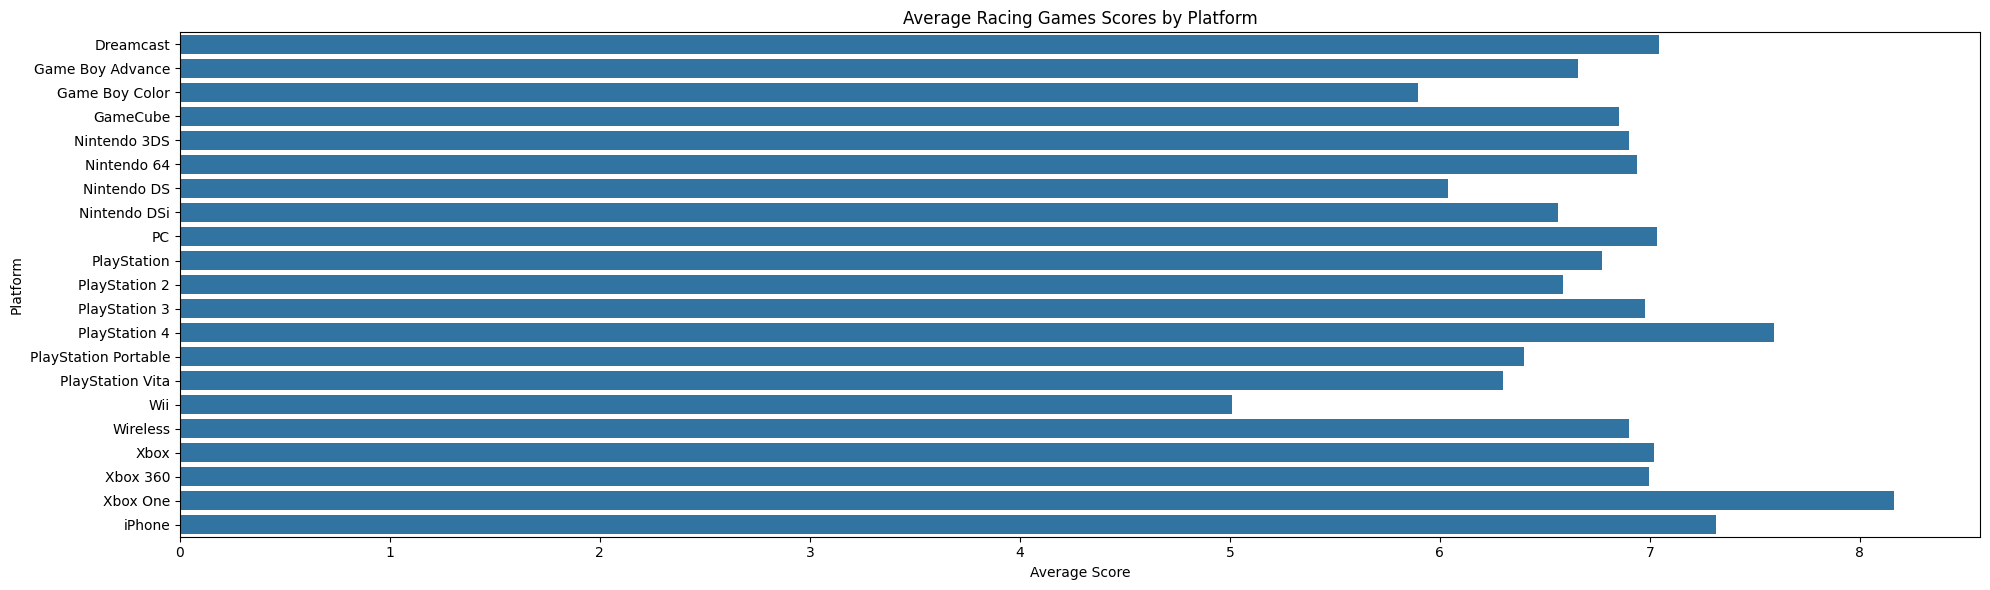

In [40]:
# (1 point)
# Set the width and height of the figure
# Your code here . . .
racing_scores = ign_scores.loc[:, 'Racing']

plt.figure(figsize=(20, 6))
sns.barplot(y = racing_scores.index, x = racing_scores)
plt.title('Average Racing Games Scores by Platform')
plt.xlabel('Average Score')
plt.ylabel('Platform')

plt.tight_layout()

In [42]:
## (1 point)
## Use ign_scores to determine which gaming platform is the best
## for racing game.

## Your code here . . .

ign_scores.loc[:, 'Racing'].idxmax()

'Xbox One'

#### Problem 4 - (2 points)
Since your instructor's gaming interests are pretty broad, you can help her decide to use the IGN scores to determine the choice of genre and platform.

1. Create a heatmap using the IGN scores by genre and platform and include the scores in the cells of the heatmap.
2. Base on the heatmap, which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings? Write the answers in a markdown cell.

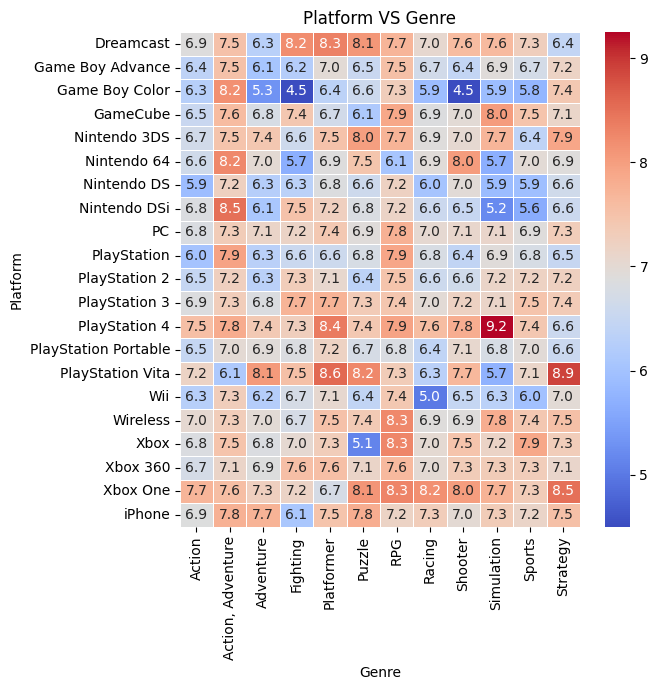

In [48]:
## Create a heatmap
# Your code here . . .
plt.figure(figsize=(7, 7))
sns.heatmap(ign_scores, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.5)
plt.title('Platform VS Genre')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

# highest PS4 Sim
# lowest Game Boy Color fighting and shooter

## Problem 5 - (4 points)
Use the Pokemon dataset to create a clustermap with color. First, filter the dataframe to only keep data with `Type 1` equals to following values: `Water`, `Normal`, `Grass`, `Bug` and `Psychic`. Annotate the dendrogram using different colors for these five different `Type 1` values. Use `Name` as the index.

pokemon_data is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

In [61]:
# Problem 5
# Your code here . . .

pkm = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv')

filtered = pkm[pkm['Type 1'].isin(['Water', 'Normal', 'Grass', 'Bug', 'Psychic'])]
filtered.set_index('Name', inplace = True)

filtered.columns

Index(['#', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

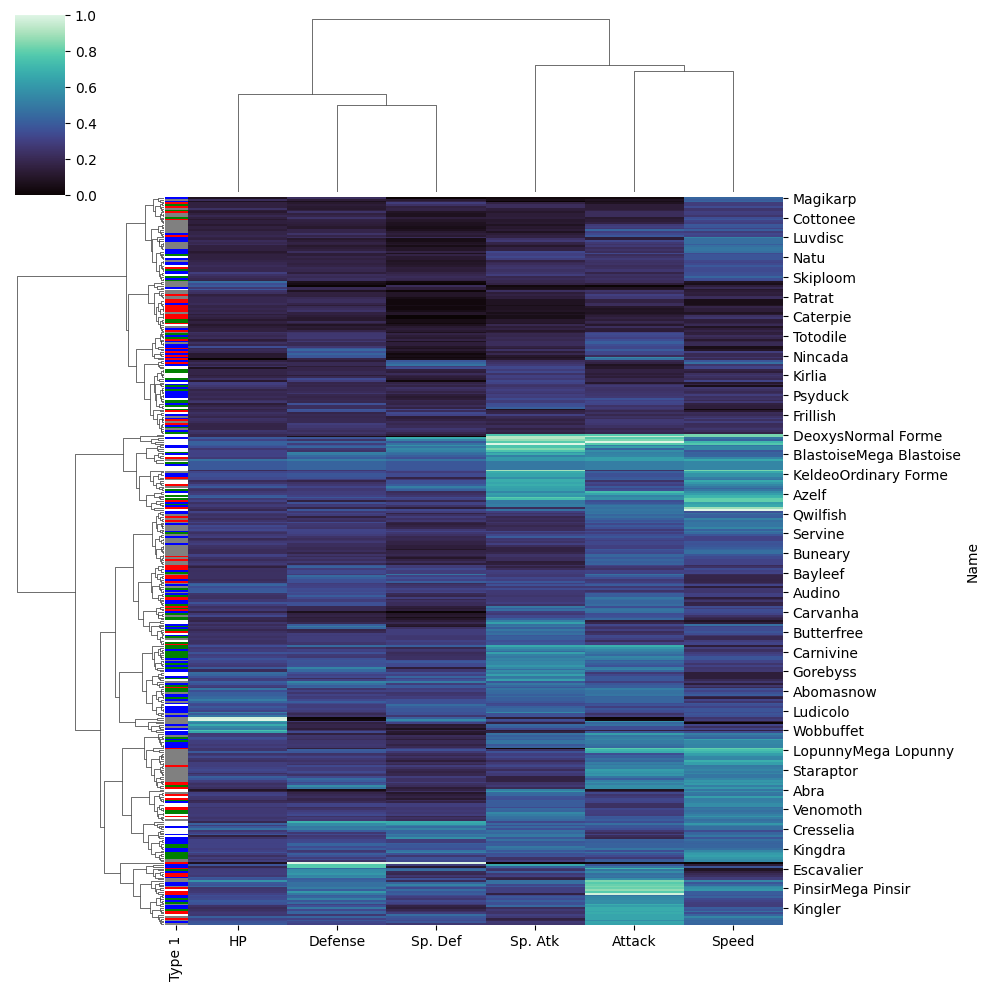

In [66]:
sns.clustermap(filtered[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']],
               metric="euclidean",
               standard_scale=1,
               method="ward",
               cmap="mako",
               row_colors = filtered['Type 1'].map({
                   'Water' : 'blue',
                   'Normal' : 'gray',
                   'Grass' : 'green',
                   'Bug' : 'red',
                   'Phychic' : 'yellow',

               }))